#### Thử nghiệm cách Ensemble khác, không dùng số lượng mẫu trong winning node nữa mà dùng khoảng cách từ input đến winning node. (1/d1) / ( 1/d1 + 1/d2 + 1/d3)

In [24]:
import numpy as np
from sklearn.metrics import euclidean_distances
import pandas as pd

import sys
sys.path.insert(0, '../SOM-LVQ')
import SOM_LVQ
from minisom import MiniSom
from supervisedSom import supervisedSom

In [25]:
data = pd.read_csv(r"../data/AReM/Dataset1(combined).csv")
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
y[y==7] = 0
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

# use Minmaxscaler because we use euclidean distance
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

In [26]:
# Training the SOM
som1 = MiniSom(x = 25, y = 25, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som1.random_weights_init(x_train)
som1.train_random(data = x_train, num_iteration = 100)

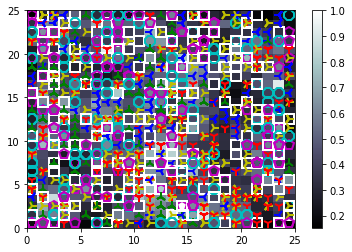

In [27]:
suso1 = supervisedSom(som1, x_train, y_train)

label1= suso1.visualSom()

In [28]:
taggings1 = suso1.taggingSom()

p_vectors = SOM_LVQ.init_LVQ_pvectors(som1, taggings1, x_train, y_train)

In [29]:
lvq1 = SOM_LVQ.SOM_LVQ(x_train, y_train, n_classes=7, n_neurons=35, p_vectors=p_vectors, epsilon=0.9, epsilon_dec_factor=0.001)
neurons = lvq1.train_LVQ_neighbors(x_train, y_train)

In [30]:
predicted_y1 = [lvq1.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y1, target_names=['0', '1', '2', '3', '4', '5', '6']))

             precision    recall  f1-score   support

          0       0.76      0.62      0.68       119
          1       0.97      1.00      0.98       124
          2       0.97      0.91      0.94       129
          3       0.66      0.68      0.67       130
          4       0.90      0.95      0.93       124
          5       0.76      0.79      0.77       107
          6       0.82      0.92      0.86       107

avg / total       0.84      0.84      0.84       840



In [31]:
# Training the SOM
som2 = MiniSom(x = 25, y = 25, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som2.random_weights_init(x_train)
som2.train_random(data = x_train, num_iteration = 100)

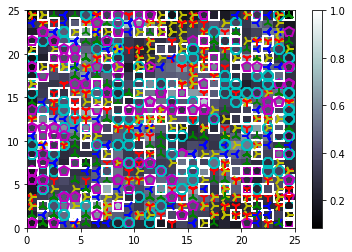

In [32]:
suso2 = supervisedSom(som2, x_train, y_train)

label2 = suso2.visualSom()

In [33]:
taggings2 = suso2.taggingSom()

p_vectors = SOM_LVQ.init_LVQ_pvectors(som2, taggings2, x_train, y_train)

In [34]:
lvq2 = SOM_LVQ.SOM_LVQ(x_train, y_train, n_classes=4, n_neurons=35, p_vectors=p_vectors, epsilon=0.9, epsilon_dec_factor=0.001)
neurons = lvq2.train_LVQ_neighbors(x_train, y_train)

In [35]:
predicted_y2 = [lvq2.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y2, target_names=['0', '1', '2', '3', '4', '5', '6']))

             precision    recall  f1-score   support

          0       0.72      0.54      0.62       119
          1       0.99      1.00      1.00       124
          2       0.96      0.97      0.97       129
          3       0.64      0.78      0.70       130
          4       0.98      0.98      0.98       124
          5       0.88      0.73      0.80       107
          6       0.80      0.93      0.86       107

avg / total       0.85      0.85      0.85       840



In [36]:
# Training the SOM
som3 = MiniSom(x = 25, y = 25, input_len = 6, sigma = 1.0, learning_rate = 0.5)
som3.random_weights_init(x_train)
som3.train_random(data = x_train, num_iteration = 100)

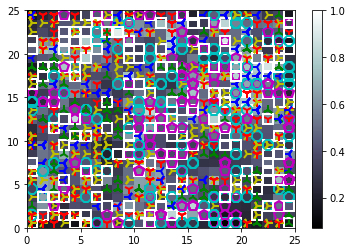

In [37]:
suso3 = supervisedSom(som3, x_train, y_train)

label3 = suso3.visualSom()

In [38]:
taggings3 = suso3.taggingSom()

p_vectors = SOM_LVQ.init_LVQ_pvectors(som3, taggings3, x_train, y_train)

In [39]:
lvq3 = SOM_LVQ.SOM_LVQ(x_train, y_train, n_classes=7, n_neurons=35, p_vectors=p_vectors, epsilon=0.9, epsilon_dec_factor=0.001)
neurons = lvq3.train_LVQ_neighbors(x_train, y_train)

In [40]:
predicted_y3 = [lvq3.predict(instance) for instance in x_test]

from sklearn.metrics import classification_report

print (classification_report(y_test, predicted_y3, target_names=['0', '1', '2', '3', '4', '5', '6']))

             precision    recall  f1-score   support

          0       0.76      0.62      0.68       119
          1       0.98      1.00      0.99       124
          2       0.99      0.89      0.94       129
          3       0.68      0.71      0.69       130
          4       0.85      0.98      0.91       124
          5       0.77      0.70      0.74       107
          6       0.79      0.92      0.85       107

avg / total       0.83      0.83      0.83       840



In [41]:
mapping1 = lvq1.win_map_LVQ(x_train)
mapping2 = lvq2.win_map_LVQ(x_train)
mapping3 = lvq3.win_map_LVQ(x_train)

In [42]:
propa1 = lvq1.propabilityLVQ()
propa2 = lvq2.propabilityLVQ()
propa3 = lvq3.propabilityLVQ()

In [43]:
result = np.array([])
for sample in x_test:
    bmu1 = lvq1.find_closest(sample)
    bmu2 = lvq2.find_closest(sample)
    bmu3 = lvq3.find_closest(sample)
    pos1 = bmu1[0]
    pos2 = bmu2[0]
    pos3 = bmu3[0]
    l1 = float(1) / np.linalg.norm(sample - bmu1[1].p_vector)
    l2 = float(1) / np.linalg.norm(sample - bmu2[1].p_vector)
    l3 = float(1) / np.linalg.norm(sample - bmu3[1].p_vector)

    pro1 = (l1*propa1[0, pos1[0], pos1[1]] + l2*propa2[0, pos2[0], pos2[1]] + l3*propa3[0, pos3[0], pos3[1]])/(l1+l2+l3)
    pro2 = (l1*propa1[1, pos1[0], pos1[1]] + l2*propa2[1, pos2[0], pos2[1]] + l3*propa3[1, pos3[0], pos3[1]])/(l1+l2+l3)
    pro3 = (l1*propa1[2, pos1[0], pos1[1]] + l2*propa2[2, pos2[0], pos2[1]] + l3*propa3[2, pos3[0], pos3[1]])/(l1+l2+l3)
    pro4 = (l1*propa1[3, pos1[0], pos1[1]] + l2*propa2[3, pos2[0], pos2[1]] + l3*propa3[3, pos3[0], pos3[1]])/(l1+l2+l3)
    pro5 = (l1*propa1[4, pos1[0], pos1[1]] + l2*propa2[4, pos2[0], pos2[1]] + l3*propa3[4, pos3[0], pos3[1]])/(l1+l2+l3)
    pro6 = (l1*propa1[5, pos1[0], pos1[1]] + l2*propa2[5, pos2[0], pos2[1]] + l3*propa3[5, pos3[0], pos3[1]])/(l1+l2+l3)
    pro7 = (l1*propa1[6, pos1[0], pos1[1]] + l2*propa2[6, pos2[0], pos2[1]] + l3*propa3[6, pos3[0], pos3[1]])/(l1+l2+l3)
    tmp = np.argmax(np.array([pro1, pro2, pro3, pro4, pro5, pro6, pro7]))
    result = np.append(result, tmp)

In [44]:
print (classification_report(y_test, result, target_names=['0', '1', '2', '3', '4', '5', '6']))

             precision    recall  f1-score   support

          0       0.73      0.67      0.70       119
          1       0.99      1.00      1.00       124
          2       0.98      0.99      0.98       129
          3       0.69      0.75      0.72       130
          4       1.00      0.98      0.99       124
          5       0.88      0.80      0.84       107
          6       0.89      0.93      0.91       107

avg / total       0.88      0.88      0.88       840

